Last update 08.01.2020

Author : Jeanne Colbois

Please send any comments, questions or remarks to Jeanne Colbois: jeanne.colbois@epfl.ch.
The author would appreciate to be cited in uses of this code, and would be very happy to hear about potential nice developments.

In [1]:
import numpy as np # maths

from time import time# timer for debug
    # gather results obtained from the runs  
    # system commands
import os

import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import DualwormFunctions as dw
import KagomeFT as kft
import AnalysisFunctions_OBC as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt
import StartStates as strst
#import matplotlib.image as mpimg
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14})

In [13]:
### First check what happens for a constant function
L = 12
(s_ijl, ijl_s) = kf.createspinsitetable(L)
nspins = len(s_ijl)
N = np.sqrt((nspins**2)/2)

(q_k1k2, k1k2_q) = kdraw.KagomeReciprocal(L)
q_k1k2 = np.array(q_k1k2)

sconf = np.array([1 for i in range(nspins)])
StrctFactPBC, m = kft.PBCStrctFact(L, sconf, ijl_s, subtractm = False, centered = True)

StrctFact = np.zeros((q_k1k2.shape[0],3, 3), dtype = 'complex128')

s_pos, ijl_pos = kf.reducedgraphkag(L, s_ijl, ijl_s)
listnei = [(0, 0), (0, 1), (1, 0), (-1, 1),
               (-1, 0), (0, -1),(1, -1)]
n1, n2, Leff, S = kf.superlattice(L)
print(n1, n2)
a = 2
xy_m1m2 = (1/a)*np.array([[1, -1/np.sqrt(3)],[0, 2/np.sqrt(3)]])
m = 0
for s1 in range(nspins):
    (i1,j1,l1) = s_ijl[s1]
    pos1 = s_pos[s1]
    vals1 = sconf[ijl_s[(i1,j1,l1)]]
    pos1list = np.array([pos1 + nei[0]*Leff*n1 + nei[1]*Leff*n2
                         for nei in listnei])
    for s2 in range(s1+1, nspins):
        (i2,j2,l2) = s_ijl[s2]
        vals2 = sconf[ijl_s[(i2,j2,l2)]]
        pos2 = s_pos[s2]
        # separation
        sep = pos2 - pos1list
        # index of minmum distance
        neiid = np.argmin([np.linalg.norm(sep[i]) for i in
                           range(sep.shape[0])])
        
        # position difference in (m1, m2) coordinates
        dm1m2 = np.dot(xy_m1m2, sep[neiid])
        c = np.asscalar(vals1*vals2) # m is zero if not subtractm

        exponent = 1j * 2 * np.pi * np.dot(q_k1k2, dm1m2) / L
        #print("s2 = ", s2, np.real(np.exp(exponent)))
        #if any(np.abs(np.imag(np.exp(exponent)))>1e-14):
        #    print("s2 = ", s2, np.imag(np.exp(exponent)))
        
        StrctFact[:,l1, l2] += c*np.exp(exponent)/N
        StrctFact[:,l2, l1] += c*np.exp(-exponent)/N
        

subtractm = False
[ 0.8660254 -0.5      ] [0.8660254 0.5      ]


/usr/lib64/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/lib64/python3.7/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


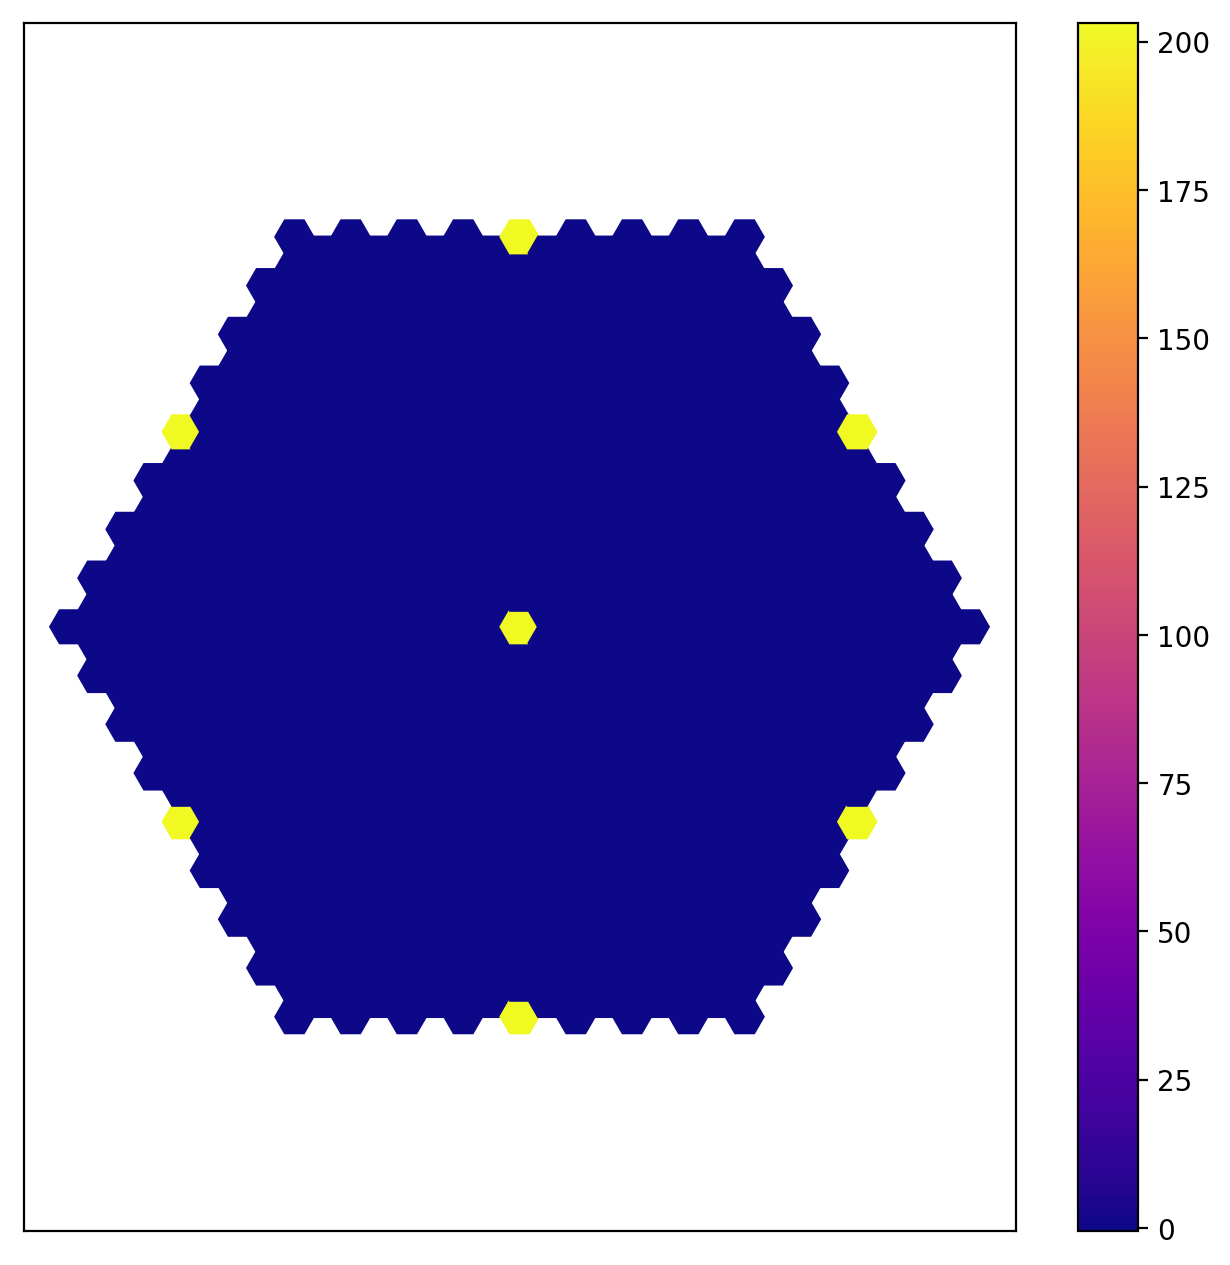

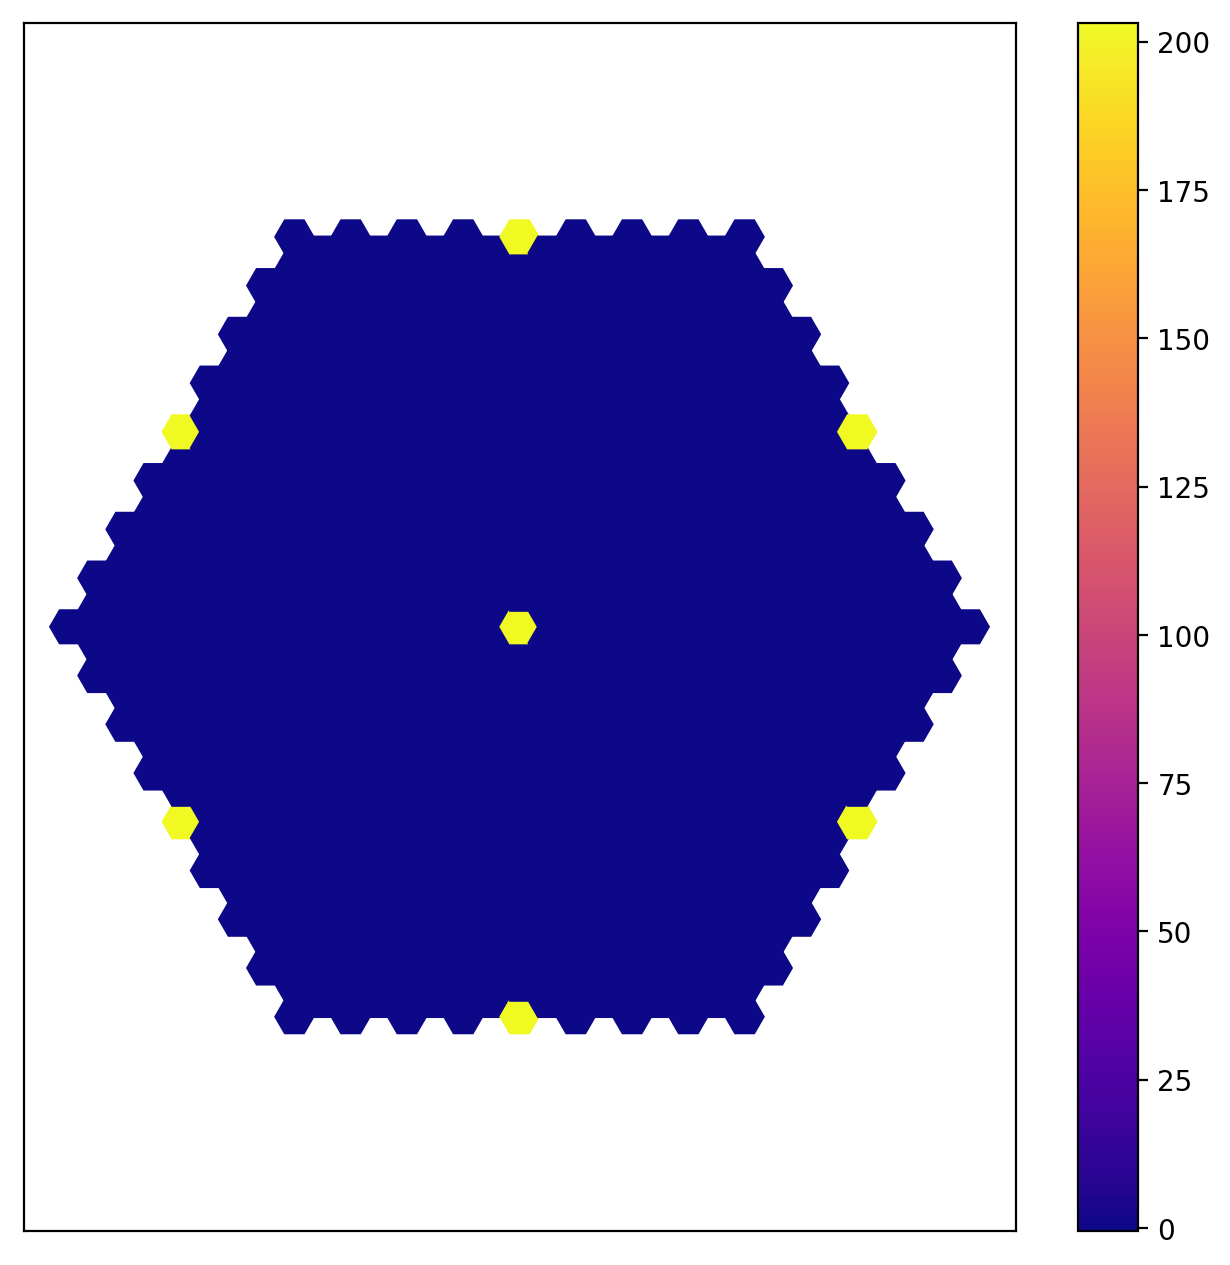

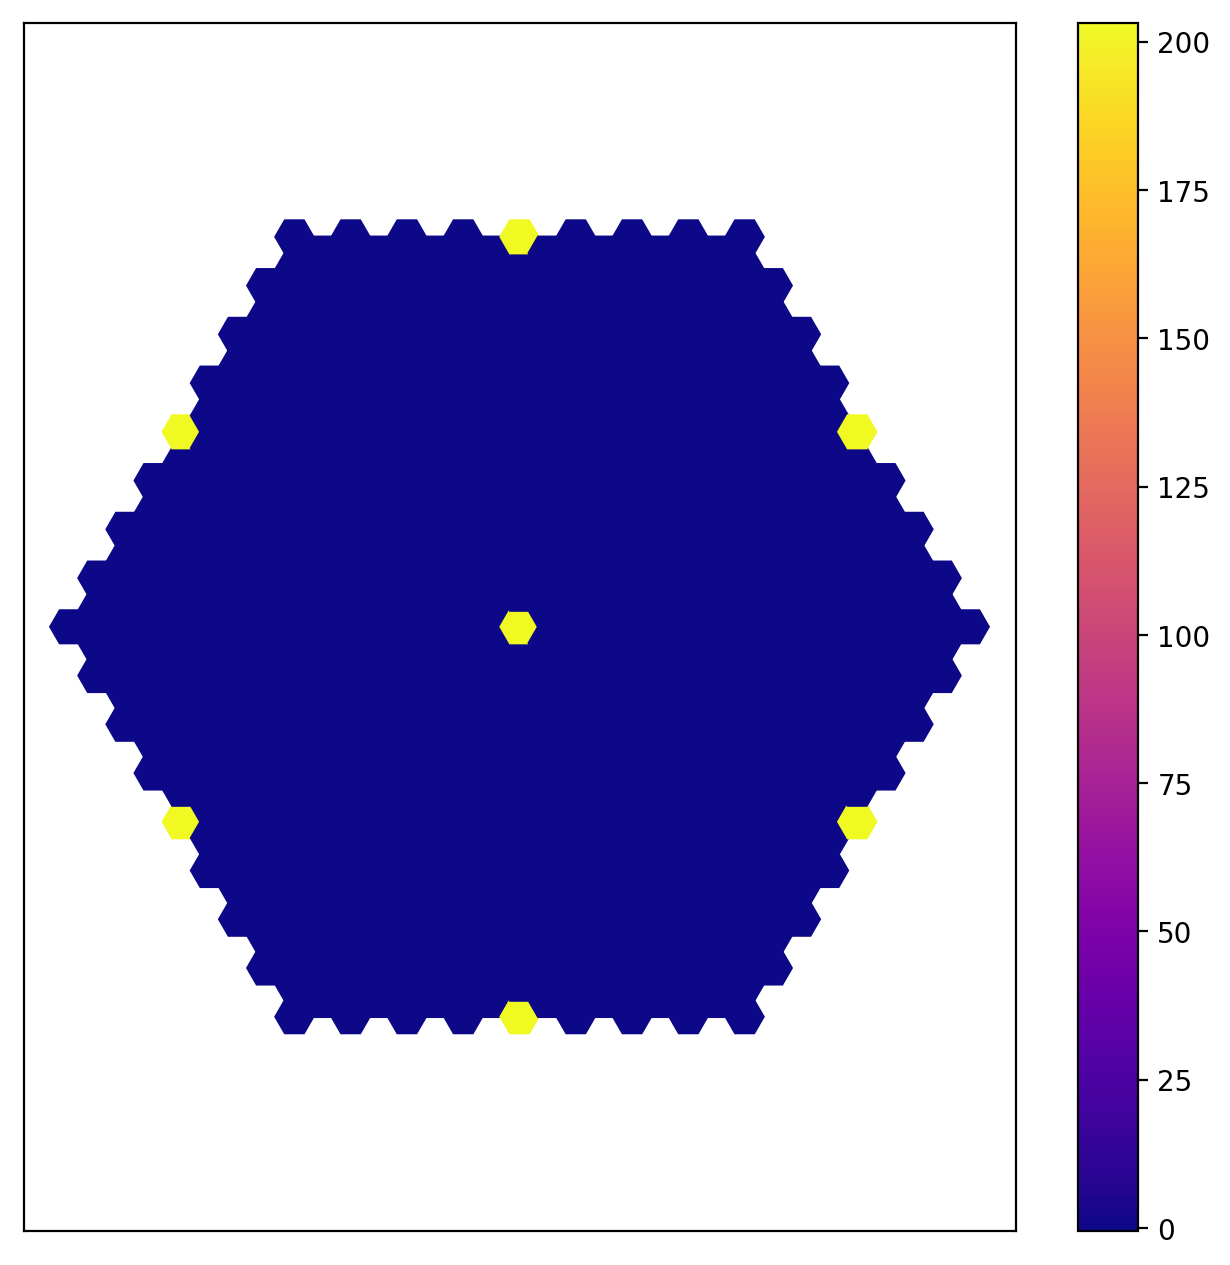

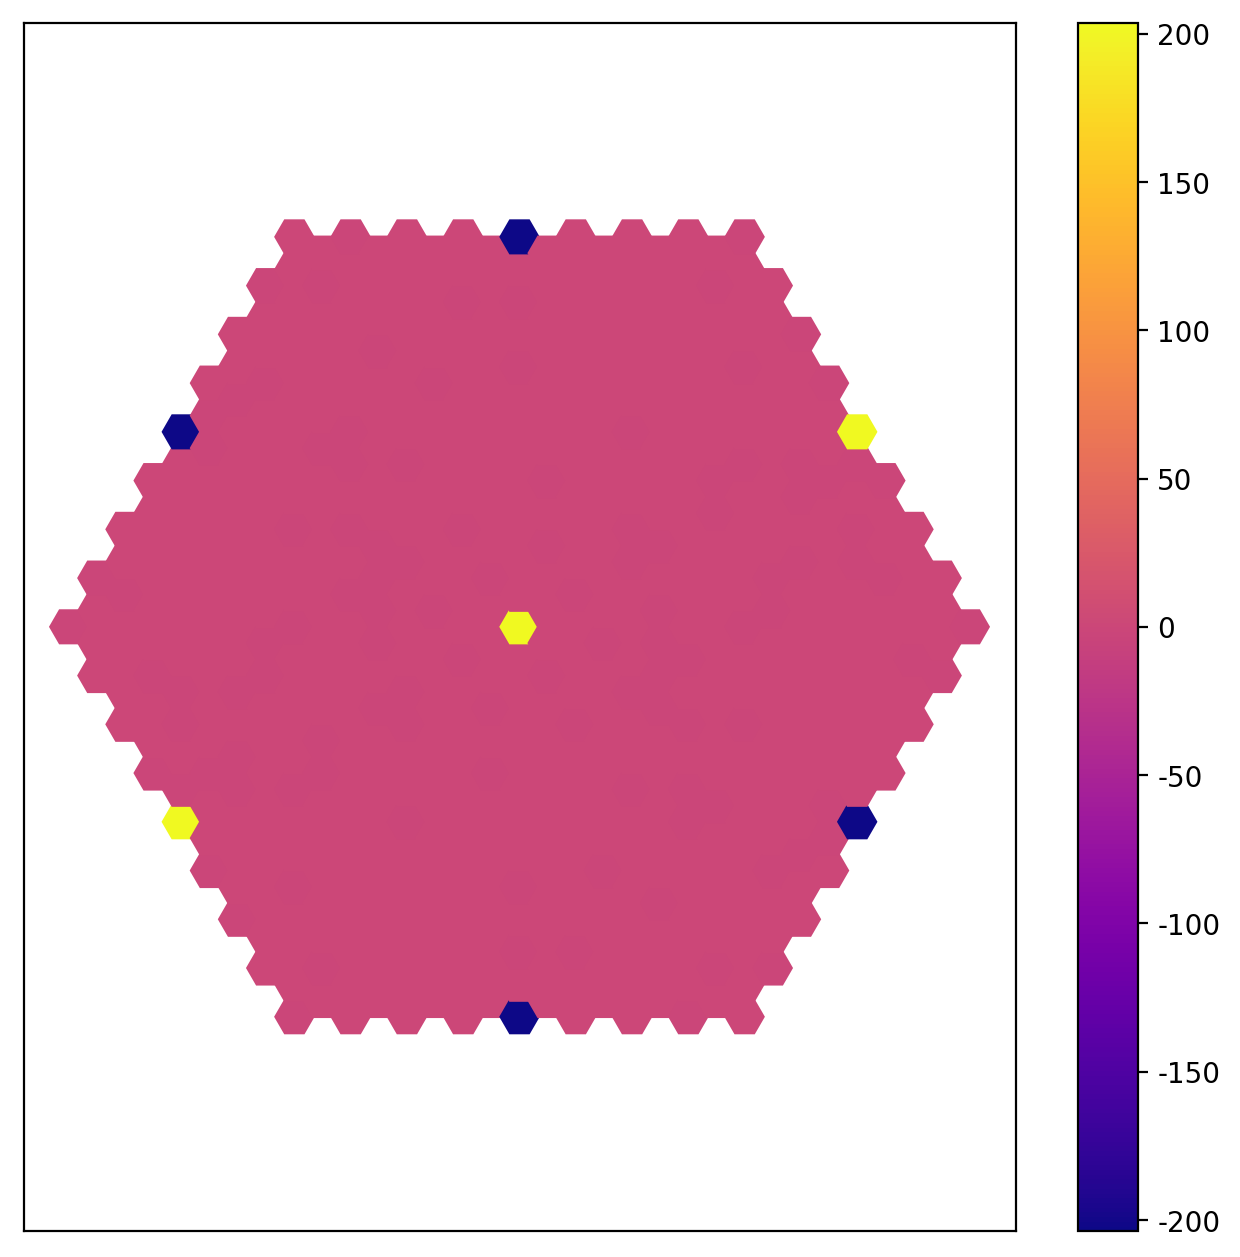

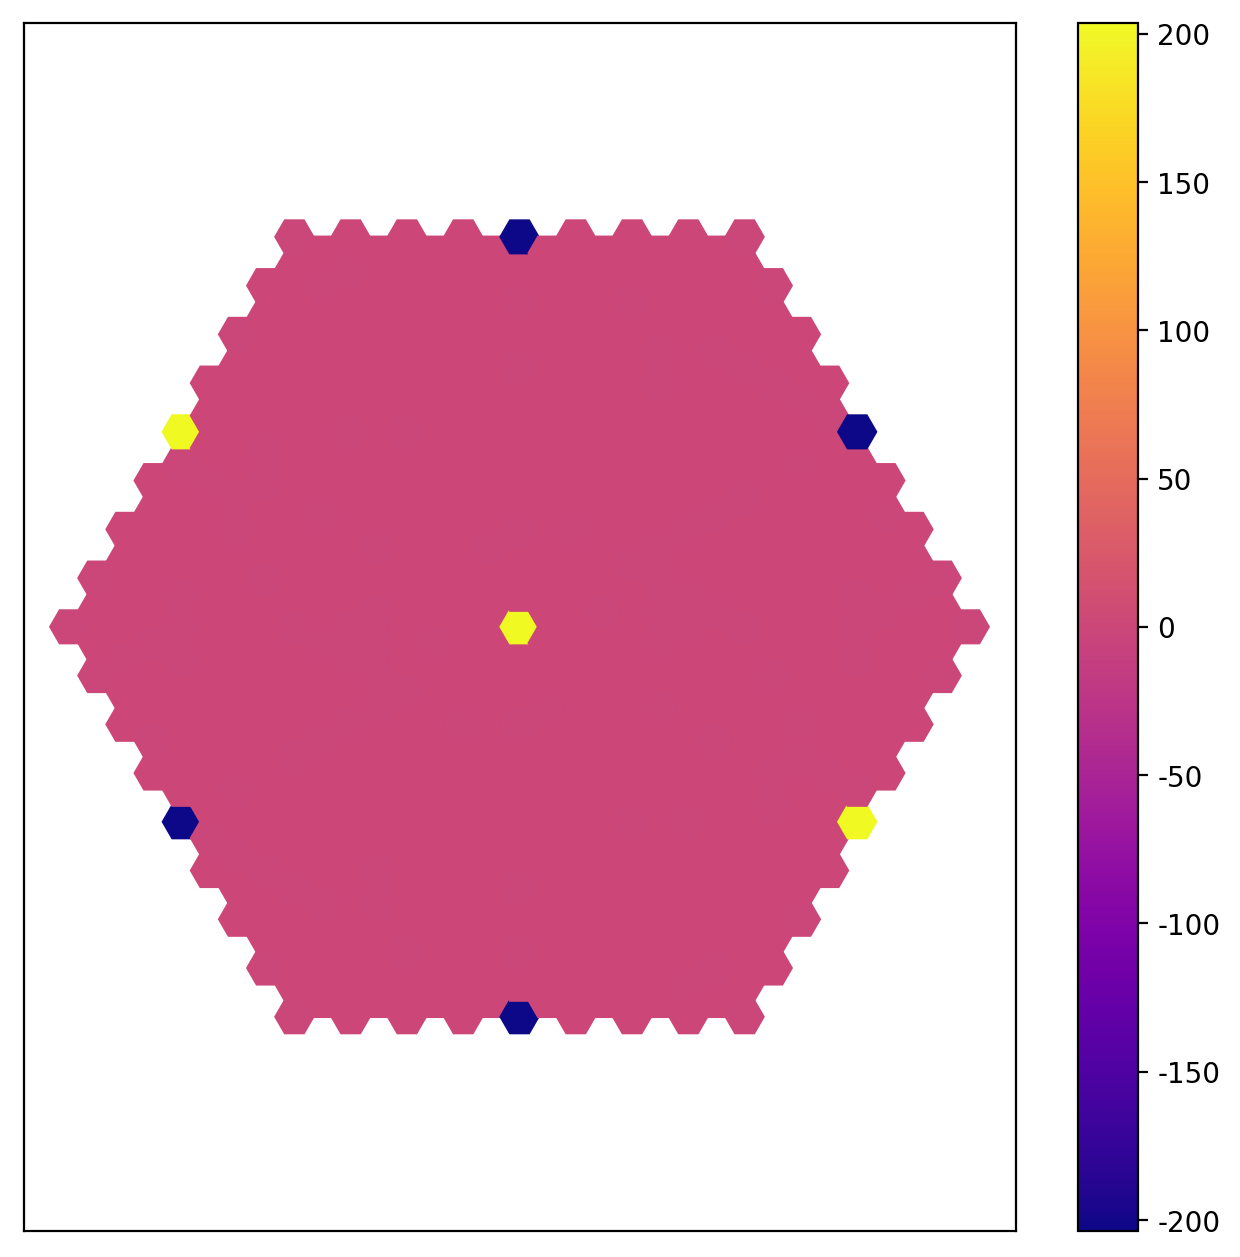

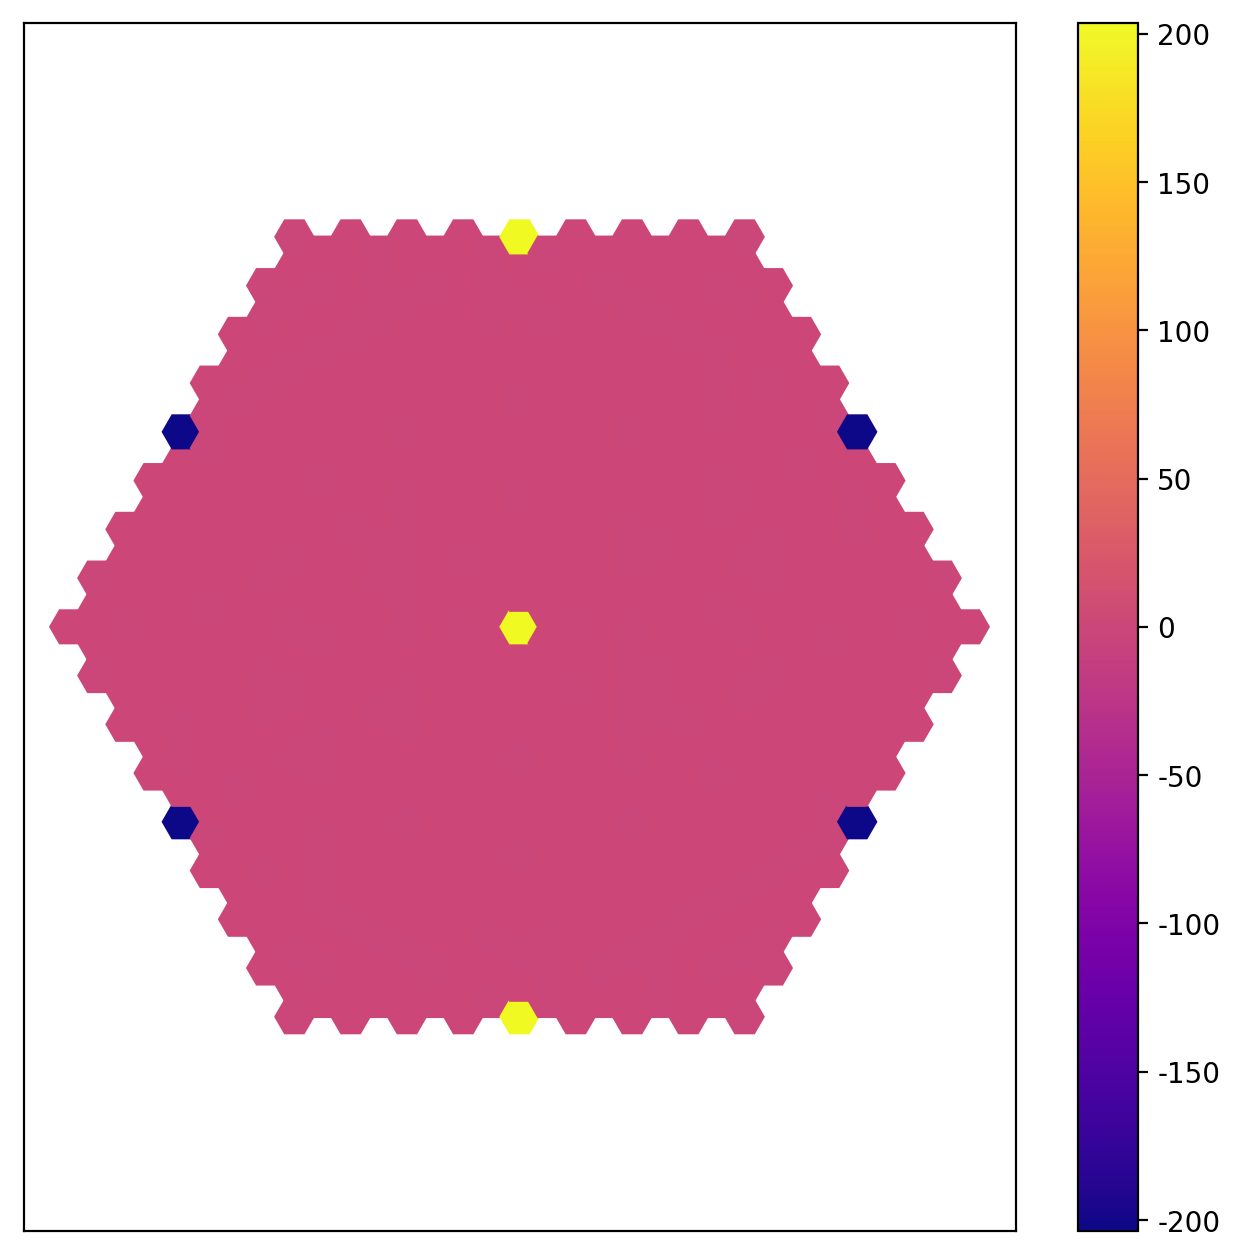

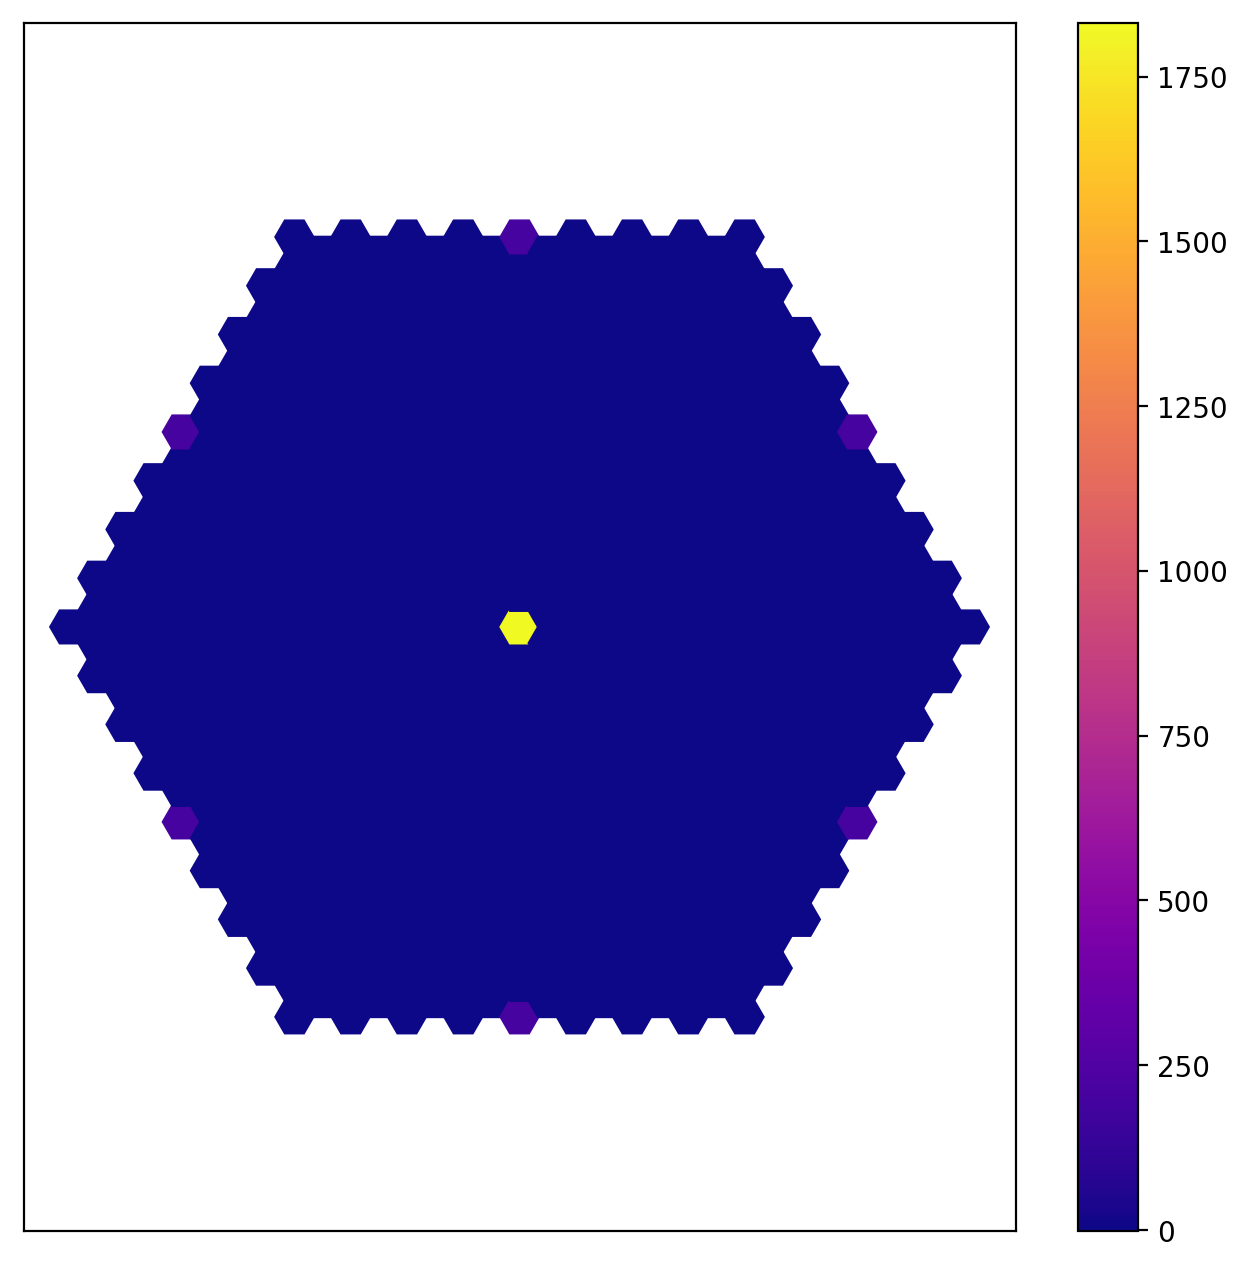

In [14]:
size = (175/L)**2
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(np.real(StrctFact[:,0,0]), L, 2, s = size)#, vmin = vmin, vmax = vmax)
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(np.real(StrctFact[:,1,1]), L, 2, s = size)#, vmin = vmin, vmax = vmax)
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(np.real(StrctFact[:,2,2]), L, 2, s = size)#, vmin = vmin, vmax = vmax)
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(np.real(StrctFact[:,0,1]+StrctFact[:,1,0])/2, L, 2, s = size)#vmin = vmin, vmax = vmax)
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(np.real(StrctFact[:,0,2]+StrctFact[:,2,0])/2, L, 2, s = size)#vmin = vmin, vmax = vmax)
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(np.real(StrctFact[:,1,2]+StrctFact[:,2,1])/2, L, 2, s = size)#vmin = vmin, vmax = vmax)
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(np.sum(StrctFact, axis = (1,2)), L, 2, s = size)#vmin = vmin, vmax = vmax)

In [11]:
corr0 = np.array([1 for i in range(nspins)])
corr1 = np.array([0 for i in range(nspins)])
StrfactComp, SF0, SF1, SF2 = kft.StrctFact(corr0, corr0, corr0)

/usr/lib64/python3.7/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/lib64/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


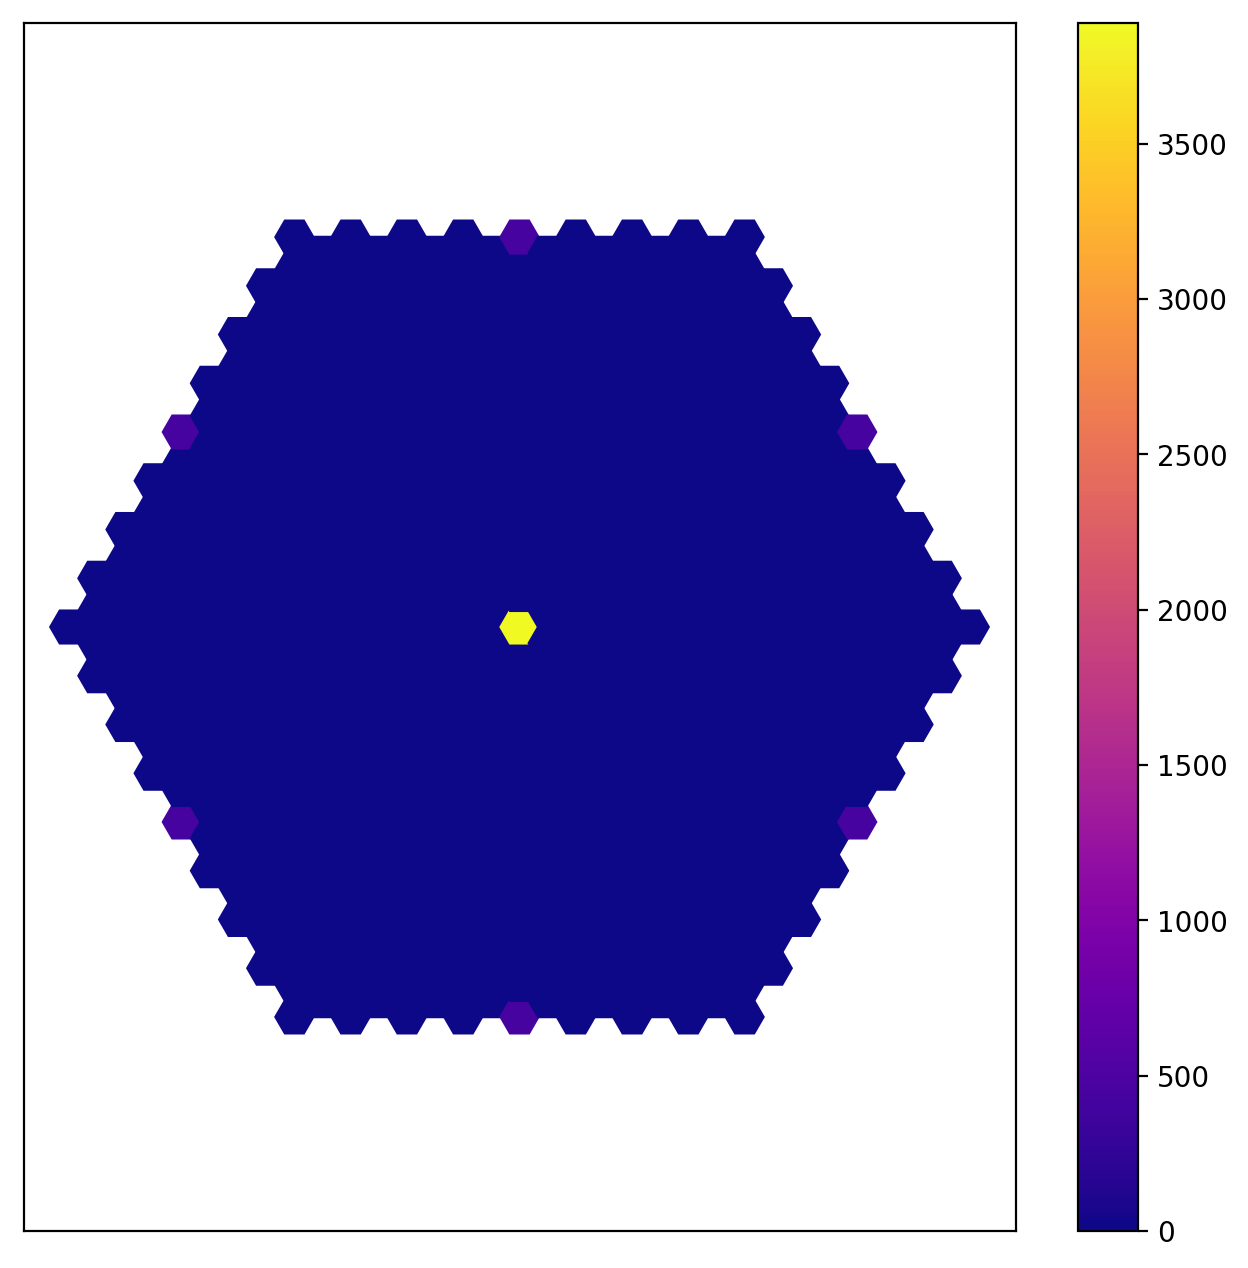

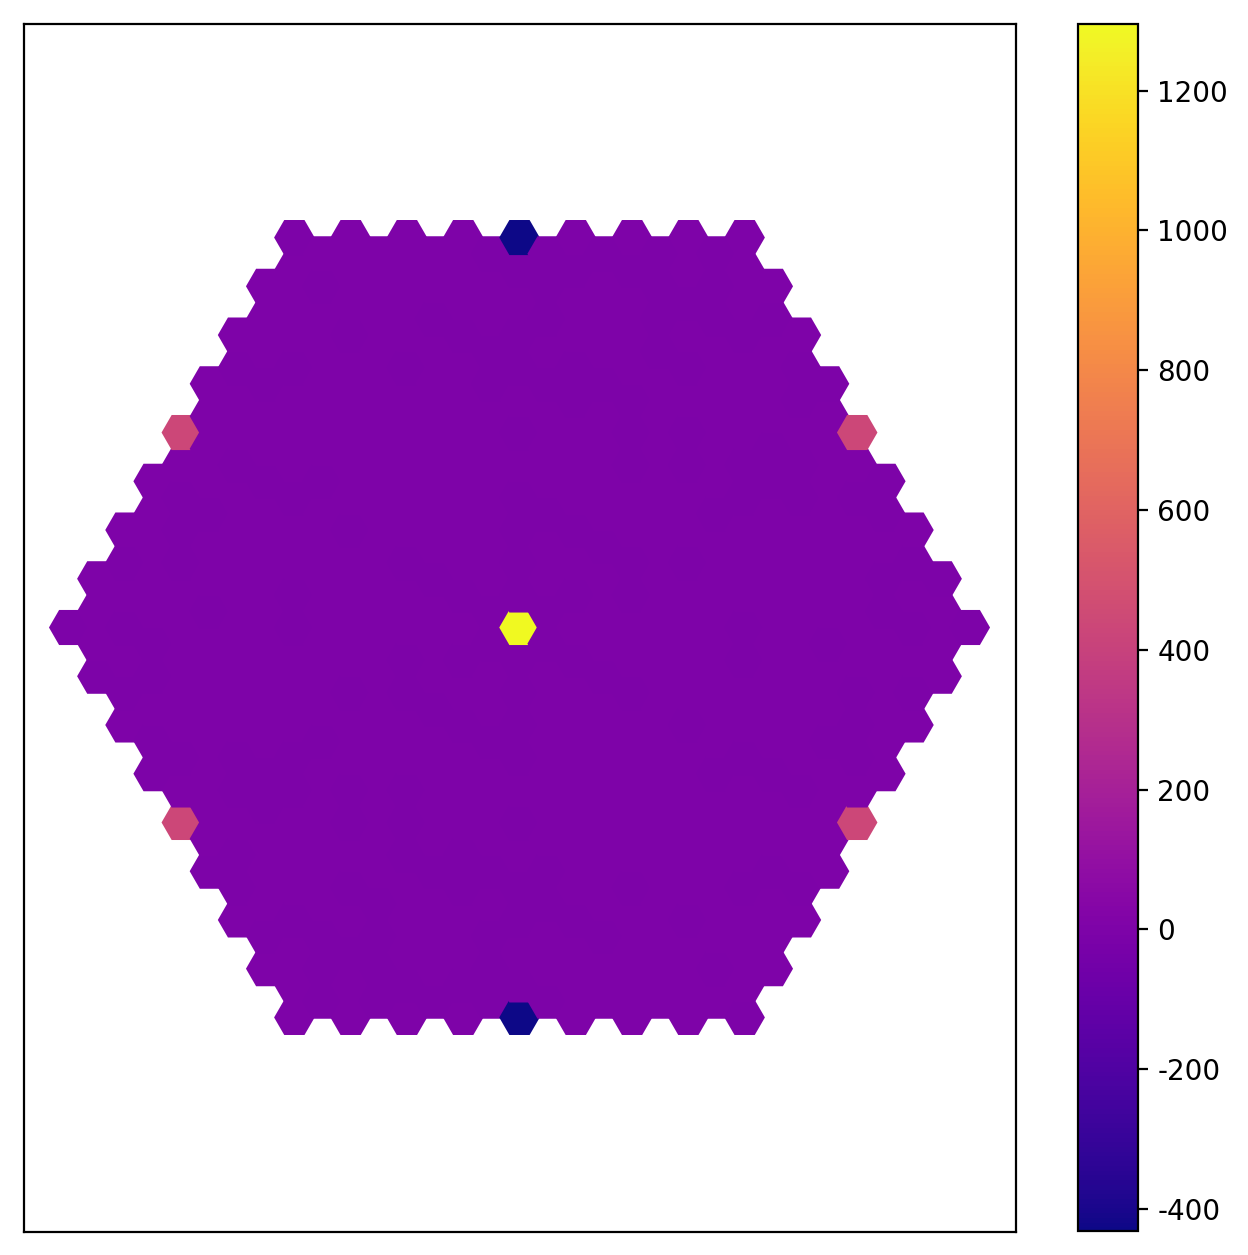

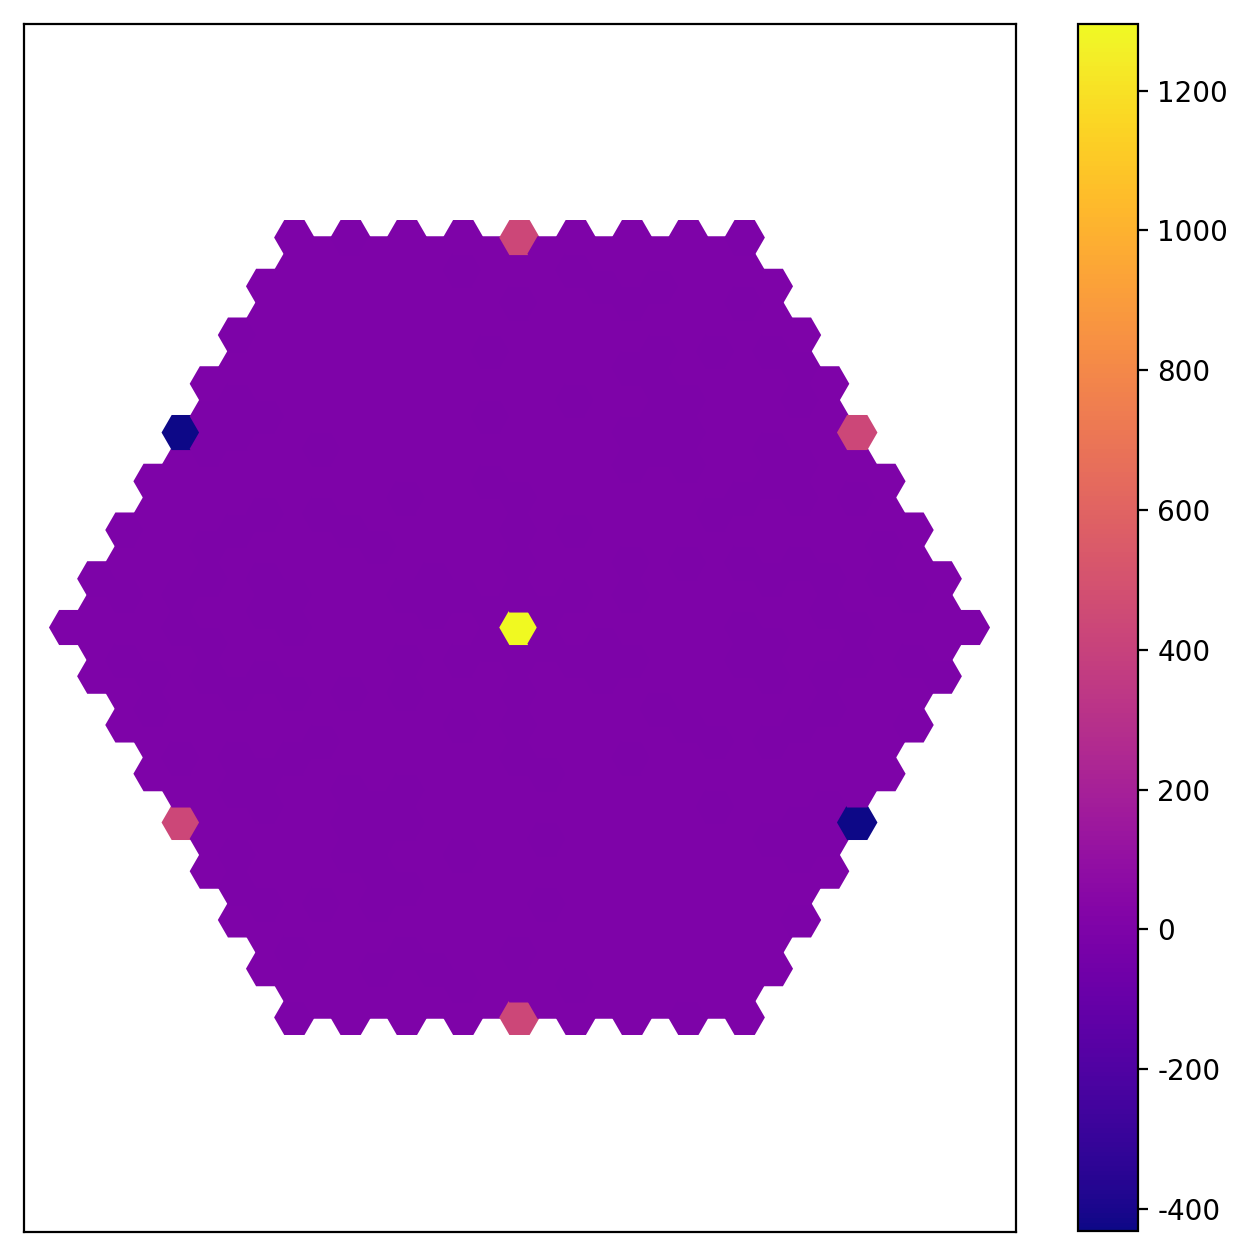

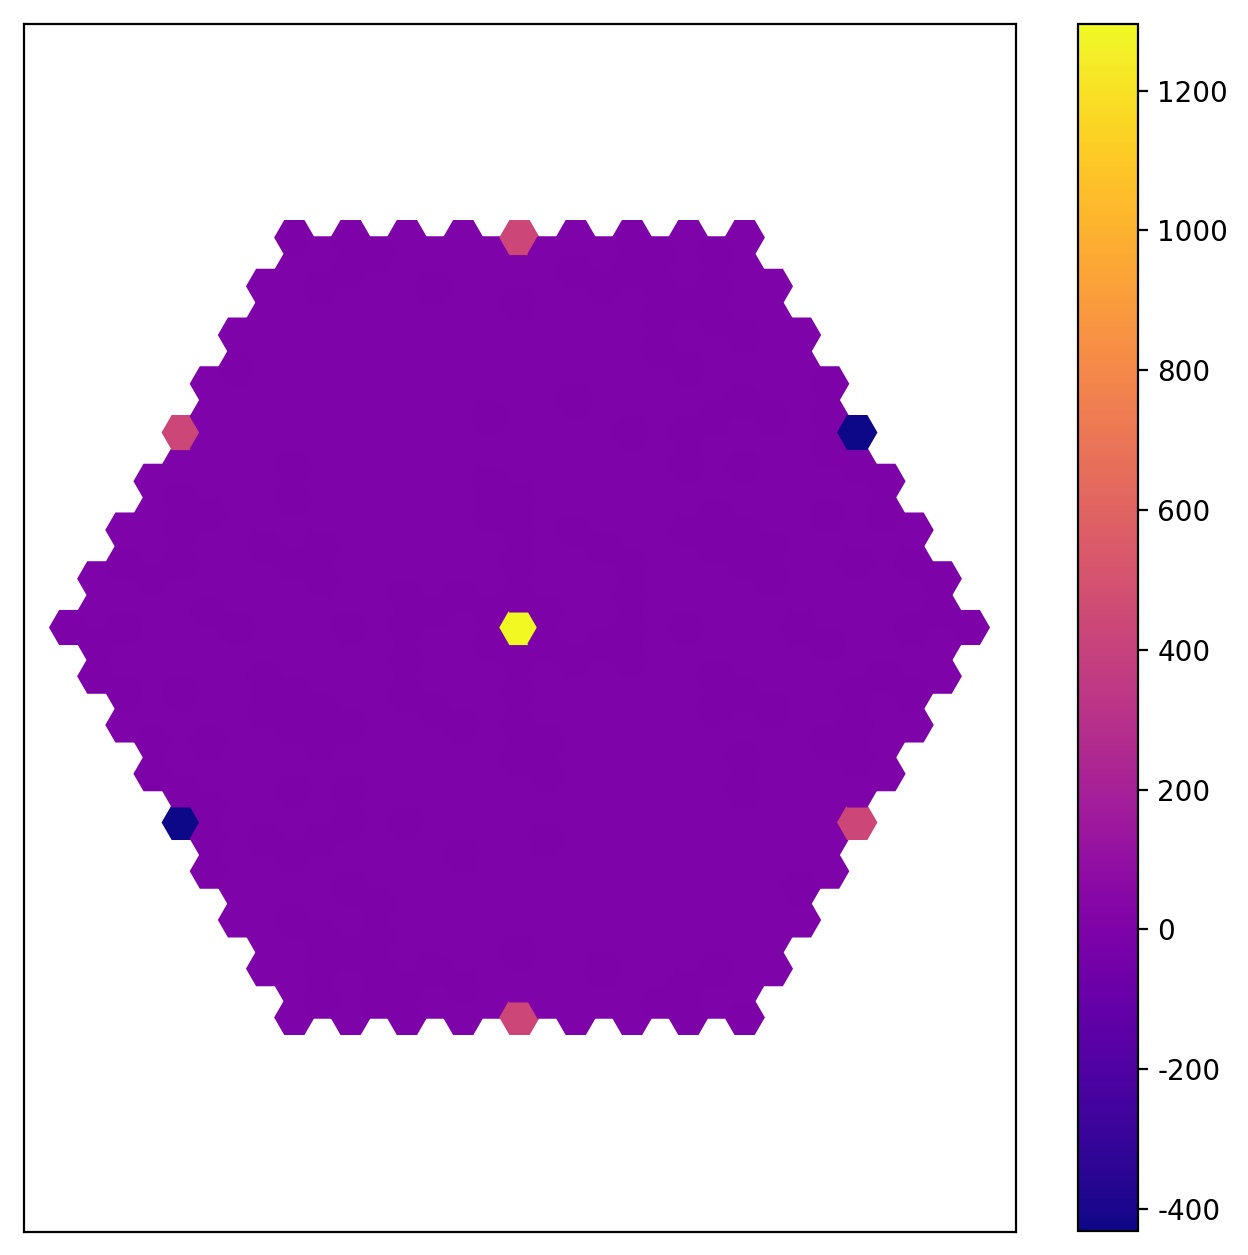

In [12]:
size = (175/L)**2
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(StrfactComp, L, 2, s = size)#, vmin = vmin, vmax = vmax)
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(SF0, L, 2, s = size)#, vmin = vmin, vmax = vmax)
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(SF1, L, 2, s = size)#, vmin = vmin, vmax = vmax)
fig, ax = plt.subplots(figsize = (8,8),dpi=200)
kdraw.plot_function_reciprocal(SF2, L, 2, s = size)#, vmin = vmin, vmax = vmax)
